In [1]:
import pandas as pd
import requests
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import datetime as dt
plt.style.use('fivethirtyeight')


API_key = "ed733879878dc4eefc0f1f08664391a3"


ticker = "MCD"

In [2]:
# pulling the data for the company

url2 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url2 = url2 + ticker + "?period=10&type=rsi" + "&apikey=" + API_key

indicator = requests.get(query_url2).json()

print(indicator)

[{'date': '2020-11-16', 'open': 215.5, 'high': 216.75, 'low': 213.630096, 'close': 216.729996, 'volume': 3696238.0, 'rsi': 48.716286664409026}, {'date': '2020-11-13', 'open': 213.759995, 'high': 214.389999, 'low': 212.339996, 'close': 213.279999, 'volume': 3072100.0, 'rsi': 39.700564429535525}, {'date': '2020-11-12', 'open': 217.559998, 'high': 217.820007, 'low': 210.880005, 'close': 213.070007, 'volume': 4253200.0, 'rsi': 39.11420545193516}, {'date': '2020-11-11', 'open': 214.809998, 'high': 219.25, 'low': 214.300003, 'close': 218.020004, 'volume': 4126900.0, 'rsi': 49.2807195608891}, {'date': '2020-11-10', 'open': 215.75, 'high': 215.990005, 'low': 211.339996, 'close': 213.320007, 'volume': 4255600.0, 'rsi': 34.79870708734518}, {'date': '2020-11-09', 'open': 226.789993, 'high': 227.850006, 'low': 207.169998, 'close': 213.220001, 'volume': 7981200.0, 'rsi': 34.44022764428747}, {'date': '2020-11-06', 'open': 216.0, 'high': 217.889999, 'low': 214.25, 'close': 216.559998, 'volume': 39161

In [3]:
#creating DataFrame

indicator_df = pd.DataFrame(indicator)
indicator_df = indicator_df.sort_values(by="date")
indicator_df

,date,open,high,low,close,volume,rsi
1258,2015-11-17,97.400600,98.180600,96.820600,97.300600,6027600.0,0.000000
1257,2015-11-18,97.465100,98.755100,97.005100,98.695100,5194500.0,100.000000
1256,2015-11-19,98.600400,99.780400,98.370400,99.370400,5323500.0,100.000000
1255,2015-11-20,99.355400,100.165400,99.185400,99.905400,6659400.0,100.000000
1254,2015-11-23,99.936600,100.826600,99.836600,100.396600,4968400.0,100.000000
...,...,...,...,...,...,...,...
4,2020-11-10,215.750000,215.990005,211.339996,213.320007,4255600.0,34.798707
3,2020-11-11,214.809998,219.250000,214.300003,218.020004,4126900.0,49.280720
2,2020-11-12,217.559998,217.820007,210.880005,213.070007,4253200.0,39.114205
1,2020-11-13,213.759995,214.389999,212.339996,213.279999,3072100.0,39.700564


In [4]:
# pulling the market data (SPY)

url3 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url3 = url3 + "SPY?period=10&type=rsi" + "&apikey=" + API_key

spy = requests.get(query_url3).json()

print(spy)


[{'date': '2020-11-16', 'open': 360.980011, 'high': 362.579987, 'low': 359.589996, 'close': 362.570007, 'volume': 65777372.0, 'rsi': 71.3080307311326}, {'date': '2020-11-13', 'open': 355.269989, 'high': 358.899994, 'low': 354.709991, 'close': 358.100006, 'volume': 62892200.0, 'rsi': 67.46742883715231}, {'date': '2020-11-12', 'open': 355.579987, 'high': 356.720001, 'low': 351.26001, 'close': 353.209991, 'volume': 67546200.0, 'rsi': 62.529124440155556}, {'date': '2020-11-11', 'open': 356.399994, 'high': 357.559998, 'low': 355.059998, 'close': 356.670013, 'volume': 58649000.0, 'rsi': 69.22032896995137}, {'date': '2020-11-10', 'open': 353.48999, 'high': 355.179993, 'low': 350.51001, 'close': 354.040009, 'volume': 85552000.0, 'rsi': 66.78911933645477}, {'date': '2020-11-09', 'open': 363.970001, 'high': 364.380005, 'low': 354.059998, 'close': 354.559998, 'volume': 172304200.0, 'rsi': 67.74123964999349}, {'date': '2020-11-06', 'open': 349.929993, 'high': 351.51001, 'low': 347.649994, 'close':

In [5]:
#creating DataFrame

spy_df = pd.DataFrame(spy)
spy_df = spy_df.sort_values(by='date')
spy_df

,date,open,high,low,close,volume,rsi
1258,2015-11-17,187.506300,188.556300,186.396300,186.986300,121123700.0,0.000000
1257,2015-11-18,187.263000,190.123000,187.213000,189.953000,121342500.0,100.000000
1256,2015-11-19,189.829200,190.289200,189.439200,189.789200,88220500.0,94.219837
1255,2015-11-20,190.620800,191.290800,190.030800,190.480800,94011500.0,95.452873
1254,2015-11-23,190.572500,191.172500,189.712500,190.262500,64931200.0,88.808607
...,...,...,...,...,...,...,...
4,2020-11-10,353.489990,355.179993,350.510010,354.040009,85552000.0,66.789119
3,2020-11-11,356.399994,357.559998,355.059998,356.670013,58649000.0,69.220329
2,2020-11-12,355.579987,356.720001,351.260010,353.209991,67546200.0,62.529124
1,2020-11-13,355.269989,358.899994,354.709991,358.100006,62892200.0,67.467429


In [6]:
# pulling VIX data

url4 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url4 = url4 + "UVXY?period=10&type=rsi" + "&apikey=" + API_key

vix = requests.get(query_url4).json()

print(vix)


[{'date': '2020-11-16', 'open': 12.55, 'high': 13.28, 'low': 12.54, 'close': 12.6, 'volume': 31756884.0, 'rsi': 31.359321008358837}, {'date': '2020-11-13', 'open': 13.66, 'high': 13.66, 'low': 12.73, 'close': 13.05, 'volume': 43994400.0, 'rsi': 32.79737897633361}, {'date': '2020-11-12', 'open': 13.3, 'high': 14.82, 'low': 13.09, 'close': 14.37, 'volume': 68251200.0, 'rsi': 37.314849922717535}, {'date': '2020-11-11', 'open': 13.18, 'high': 13.44, 'low': 12.64, 'close': 13.06, 'volume': 34220400.0, 'rsi': 28.52110338630687}, {'date': '2020-11-10', 'open': 13.63, 'high': 14.4, 'low': 13.45, 'close': 13.49, 'volume': 36231600.0, 'rsi': 29.754200343357567}, {'date': '2020-11-09', 'open': 13.14, 'high': 14.18, 'low': 12.18, 'close': 14.18, 'volume': 54605600.0, 'rsi': 31.73573955648732}, {'date': '2020-11-06', 'open': 16.01, 'high': 16.08, 'low': 14.63, 'close': 14.67, 'volume': 53209600.0, 'rsi': 33.1465959863587}, {'date': '2020-11-05', 'open': 15.89, 'high': 16.530001, 'low': 15.65, 'clos

In [7]:
#creating DataFrame

vix_df = pd.DataFrame(vix)
vix_df = vix_df.sort_values(by='date')
vix_df

,date,open,high,low,close,volume,rsi
1258,2015-11-17,14560.00,17125.00,14430.00,16540.00,71500.0,0.000000
1257,2015-11-18,15945.00,16030.00,14400.00,14460.00,51100.0,0.000000
1256,2015-11-19,14740.00,15830.00,14600.00,15450.00,40700.0,34.591195
1255,2015-11-20,14510.00,14715.00,14075.00,14445.00,43700.0,24.882708
1254,2015-11-23,14250.00,14540.00,13505.00,13670.00,41900.0,20.058934
...,...,...,...,...,...,...,...
4,2020-11-10,13.63,14.40,13.45,13.49,36231600.0,29.754200
3,2020-11-11,13.18,13.44,12.64,13.06,34220400.0,28.521103
2,2020-11-12,13.30,14.82,13.09,14.37,68251200.0,37.314850
1,2020-11-13,13.66,13.66,12.73,13.05,43994400.0,32.797379


In [8]:
#merging data

merge_df = pd.merge(indicator_df,spy_df, on="date", how="left", suffixes=("","_SPY"))
#merge_df = merge_df[merge_df["date"] > "2018-12-31"]
merge_df

,date,open,high,low,close,volume,rsi,open_SPY,high_SPY,low_SPY,close_SPY,volume_SPY,rsi_SPY
0,2015-11-17,97.400600,98.180600,96.820600,97.300600,6027600.0,0.000000,187.506300,188.556300,186.396300,186.986300,121123700.0,0.000000
1,2015-11-18,97.465100,98.755100,97.005100,98.695100,5194500.0,100.000000,187.263000,190.123000,187.213000,189.953000,121342500.0,100.000000
2,2015-11-19,98.600400,99.780400,98.370400,99.370400,5323500.0,100.000000,189.829200,190.289200,189.439200,189.789200,88220500.0,94.219837
3,2015-11-20,99.355400,100.165400,99.185400,99.905400,6659400.0,100.000000,190.620800,191.290800,190.030800,190.480800,94011500.0,95.452873
4,2015-11-23,99.936600,100.826600,99.836600,100.396600,4968400.0,100.000000,190.572500,191.172500,189.712500,190.262500,64931200.0,88.808607
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-11-10,215.750000,215.990005,211.339996,213.320007,4255600.0,34.798707,353.489990,355.179993,350.510010,354.040009,85552000.0,66.789119
1255,2020-11-11,214.809998,219.250000,214.300003,218.020004,4126900.0,49.280720,356.399994,357.559998,355.059998,356.670013,58649000.0,69.220329
1256,2020-11-12,217.559998,217.820007,210.880005,213.070007,4253200.0,39.114205,355.579987,356.720001,351.260010,353.209991,67546200.0,62.529124
1257,2020-11-13,213.759995,214.389999,212.339996,213.279999,3072100.0,39.700564,355.269989,358.899994,354.709991,358.100006,62892200.0,67.467429


In [9]:
#merging data

merge_df2 = pd.merge(merge_df, vix_df, on = "date", how="left", suffixes=("", "_VIX"))
merge_df2.tail(60)

,date,open,high,low,close,volume,rsi,open_SPY,high_SPY,low_SPY,close_SPY,volume_SPY,rsi_SPY,open_VIX,high_VIX,low_VIX,close_VIX,volume_VIX,rsi_VIX
1199,2020-08-24,212.259995,213.500000,210.929993,212.619995,2463900.0,83.480368,342.119995,343.000000,339.450012,342.920013,48588700.0,76.812765,19.090000,20.129999,19.040001,19.799999,24983000.0,29.190110
1200,2020-08-25,213.960007,214.190002,212.220001,212.649994,2302400.0,83.522442,343.529999,344.209991,342.269989,344.119995,38463400.0,78.418321,19.950001,20.790001,19.459999,19.660000,27572400.0,28.484262
1201,2020-08-26,212.089996,214.419998,211.600006,213.759995,2316700.0,85.084257,344.760010,347.859985,344.170013,347.570007,50790200.0,82.327443,19.469999,20.480000,18.750000,20.309999,29100800.0,36.415999
1202,2020-08-27,214.339996,216.100006,212.100006,212.190002,3226800.0,74.053307,348.510010,349.899994,346.529999,348.329987,58034100.0,83.077671,20.000000,23.690001,19.700001,21.230000,73365600.0,45.859296
1203,2020-08-28,212.820007,216.710007,211.770004,214.910004,3212500.0,79.235505,349.440002,350.720001,348.149994,350.579987,48588900.0,85.151254,21.639999,22.980000,20.600000,21.110001,50204700.0,44.893019
1204,2020-08-31,213.520004,214.990005,212.809998,213.520004,2900900.0,71.164986,350.350006,351.299988,349.059998,349.309998,66099200.0,79.074487,21.930000,22.950001,21.219999,22.650000,41189100.0,57.624732
1205,2020-09-01,210.839996,213.610001,210.580002,212.690002,2926700.0,66.660239,350.209991,352.709991,349.239990,352.600006,54999300.0,82.640434,22.670000,23.440001,22.400000,23.240000,34285700.0,61.419117
1206,2020-09-02,213.250000,217.130005,212.690002,216.229996,4092000.0,74.353534,354.670013,358.750000,353.429993,357.700012,69540000.0,86.579538,23.150000,24.389999,23.020000,24.080000,42972600.0,66.206005
1207,2020-09-03,218.110001,218.110001,211.899994,213.800003,3126700.0,63.225855,355.869995,356.380005,342.589996,345.390015,148011100.0,53.824254,24.510000,30.280001,23.230000,28.900000,135998900.0,81.131788
1208,2020-09-04,215.289993,217.779999,210.759995,211.729996,3828600.0,55.380950,346.130005,347.829987,334.869995,342.570007,139156300.0,49.096384,27.920000,32.180000,24.570000,25.299999,129374600.0,59.370619


In [10]:
#splitting data to X values and dates

dataset_train = merge_df2
cols = list(dataset_train)[1:]

datelist_train = list(dataset_train['date'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print(f"traindata shape = {dataset_train.shape}")
print(f"time stamps = {len(dataset_train)}")
print(f"features = {cols}")


traindata shape = (1259, 19)
time stamps = 1259
features = ['open', 'high', 'low', 'close', 'volume', 'rsi', 'open_SPY', 'high_SPY', 'low_SPY', 'close_SPY', 'volume_SPY', 'rsi_SPY', 'open_VIX', 'high_VIX', 'low_VIX', 'close_VIX', 'volume_VIX', 'rsi_VIX']


In [11]:
#changing X values to numpy

dataset_train = dataset_train[cols]
dataset_train = dataset_train.astype(float)
training_set = dataset_train.to_numpy()
training_set

array([[9.74006000e+01, 9.81806000e+01, 9.68206000e+01, ...,
        1.65400000e+04, 7.15000000e+04, 0.00000000e+00],
       [9.74651000e+01, 9.87551000e+01, 9.70051000e+01, ...,
        1.44600000e+04, 5.11000000e+04, 0.00000000e+00],
       [9.86004000e+01, 9.97804000e+01, 9.83704000e+01, ...,
        1.54500000e+04, 4.07000000e+04, 3.45911950e+01],
       ...,
       [2.17559998e+02, 2.17820007e+02, 2.10880005e+02, ...,
        1.43700000e+01, 6.82512000e+07, 3.73148499e+01],
       [2.13759995e+02, 2.14389999e+02, 2.12339996e+02, ...,
        1.30500000e+01, 4.39944000e+07, 3.27973790e+01],
       [2.15500000e+02, 2.16750000e+02, 2.13630096e+02, ...,
        1.26000000e+01, 3.17568840e+07, 3.13593210e+01]])

In [12]:
# Scaling data

sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-1.59547973],
       [-1.59372536],
       [-1.56284565],
       ...,
       [ 1.67280801],
       [ 1.56944944],
       [ 1.61677688]])

In [13]:
# seperating dataset into x_train and y_train
# Creating a data structure with timestamps and 1 output


X_train = []
y_train = []

n_future = 30   # Number of days we want top predict into the future
n_past = 90     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (1140, 90, 17).
y_train shape == (1140, 1).


In [14]:
# Initializing the Neural Network based on LSTM
model = Sequential()
# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))
# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))
# Adding Dropout
model.add(Dropout(0.25))
# Output layer
model.add(Dense(units=1, activation='linear'))
# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 64)            20992     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                3000      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 24,003
Trainable params: 24,003
Non-trainable params: 0
_________________________________________________________________


In [16]:
#training data
history = model.fit(X_train, y_train, shuffle=True, epochs=50, validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/50
4/4 [==============================] - 2s 431ms/step - loss: 0.4134 - val_loss: 0.2727
Epoch 2/50
4/4 [==============================] - 1s 149ms/step - loss: 0.0940 - val_loss: 0.3044
Epoch 3/50
4/4 [==============================] - 1s 142ms/step - loss: 0.0684 - val_loss: 0.2827
Epoch 4/50
4/4 [==============================] - 1s 137ms/step - loss: 0.0584 - val_loss: 0.2662
Epoch 5/50
4/4 [==============================] - 1s 130ms/step - loss: 0.0553 - val_loss: 0.2551
Epoch 6/50
4/4 [==============================] - 0s 123ms/step - loss: 0.0474 - val_loss: 0.2552
Epoch 7/50
4/4 [==============================] - 1s 127ms/step - loss: 0.0417 - val_loss: 0.2760
Epoch 8/50
4/4 [==============================] - 0s 124ms/step - loss: 0.0393 - val_loss: 0.2676
Epoch 9/50
4/4 [==============================] - 0s 124ms/step - loss: 0.0375 - val_loss: 0.3031
Epoch 10/50
4/4 [==============================] - 1s 149ms/step - loss: 0.0370 - val_loss: 0.2578
Epoch 11/50
4/4 [==

In [17]:
model.evaluate(X_train, y_train)

36/36 [==============================] - 1s 16ms/step - loss: 0.0610


0.06100904196500778

In [18]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

# creating date information into timestamp format
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [19]:
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [20]:
# Inverse the predictions to original measurements

def datetime_to_timestamp(x):
    return dt.datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,Open
2016-09-16,107.203011
2016-09-19,107.095665
2016-09-20,107.217903


In [21]:
y_pred_future = sc_predict.inverse_transform(PREDICTIONS_FUTURE)

predictions_future = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
predictions_future

,Open
2020-11-16,7979.954102
2020-11-17,7991.786133
2020-11-18,7997.943848
2020-11-19,7989.725098
2020-11-20,7972.131348
2020-11-21,7953.635742
2020-11-22,7939.841309
2020-11-23,7945.326660
2020-11-24,7896.213867
2020-11-25,7800.040039


In [22]:
y_pred_train = sc_predict.inverse_transform(PREDICTION_TRAIN)

predictions_train = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))
predictions_train

,Open
2016-09-16,4097.403809
2016-09-19,4093.457031
2016-09-20,4097.951172
2016-09-21,4096.181641
2016-09-22,4090.981689
...,...
2020-11-10,7665.409668
2020-11-11,7652.435059
2020-11-12,7648.504395
2020-11-13,7660.230957


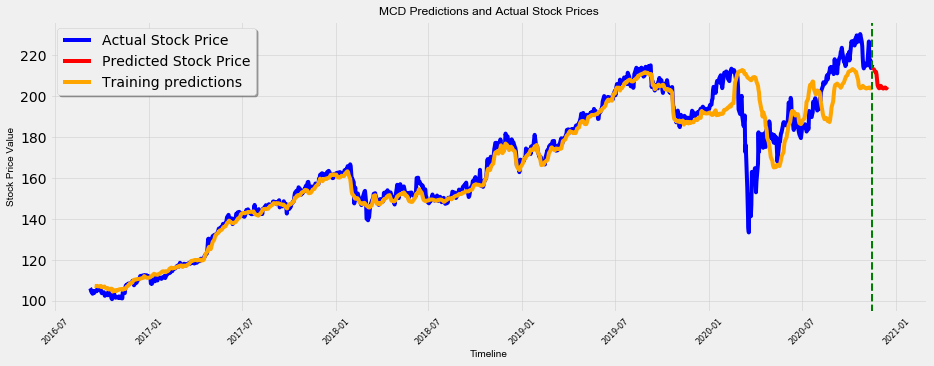

In [24]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2017-01-01' #there is a little bit of discrepancy because stock market is not open on weekends
length =  len(pd.DataFrame(datelist_train).loc[START_DATE_FOR_PLOTTING:])

plt.plot(datelist_train[-length:], dataset_train.iloc[-length:]['open'], color='b', label='Actual Stock Price')
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.iloc[-length:].index, PREDICTION_TRAIN.iloc[-length:]['Open'], color='orange', label='Training predictions')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title('MCD Predictions and Actual Stock Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()